In [17]:
import pyspark
import pyspark.pandas as ps
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, substring, length, expr, udf, explode, when, lit
from pyspark.sql.types import ArrayType, StringType, BooleanType

import os
import re

In [18]:


# Set the path to the Python executable
# Replace the path below with the path to your desired Python version
os.environ['PYSPARK_PYTHON'] = '/s/chopin/n/under/jaredk1/.conda/envs/project-env/bin/python'
os.environ['PYSPARK_DRIVER_PYTHON'] = '/s/chopin/n/under/jaredk1/.conda/envs/project-env/bin/python'

spark = SparkSession.builder \
    .appName("HW4") \
    .master("yarn") \
    .config("spark.executor.instances", "5") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")


24/04/30 21:47:02 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/30 21:47:02 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


<h2>Q1</h2>

In [30]:
q1 = spark.read.csv("hdfs:////HW4/q1/", header=True)

/tmp/ipykernel_914277/3521952065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='count', data=df.astype(int), palette='viridis')


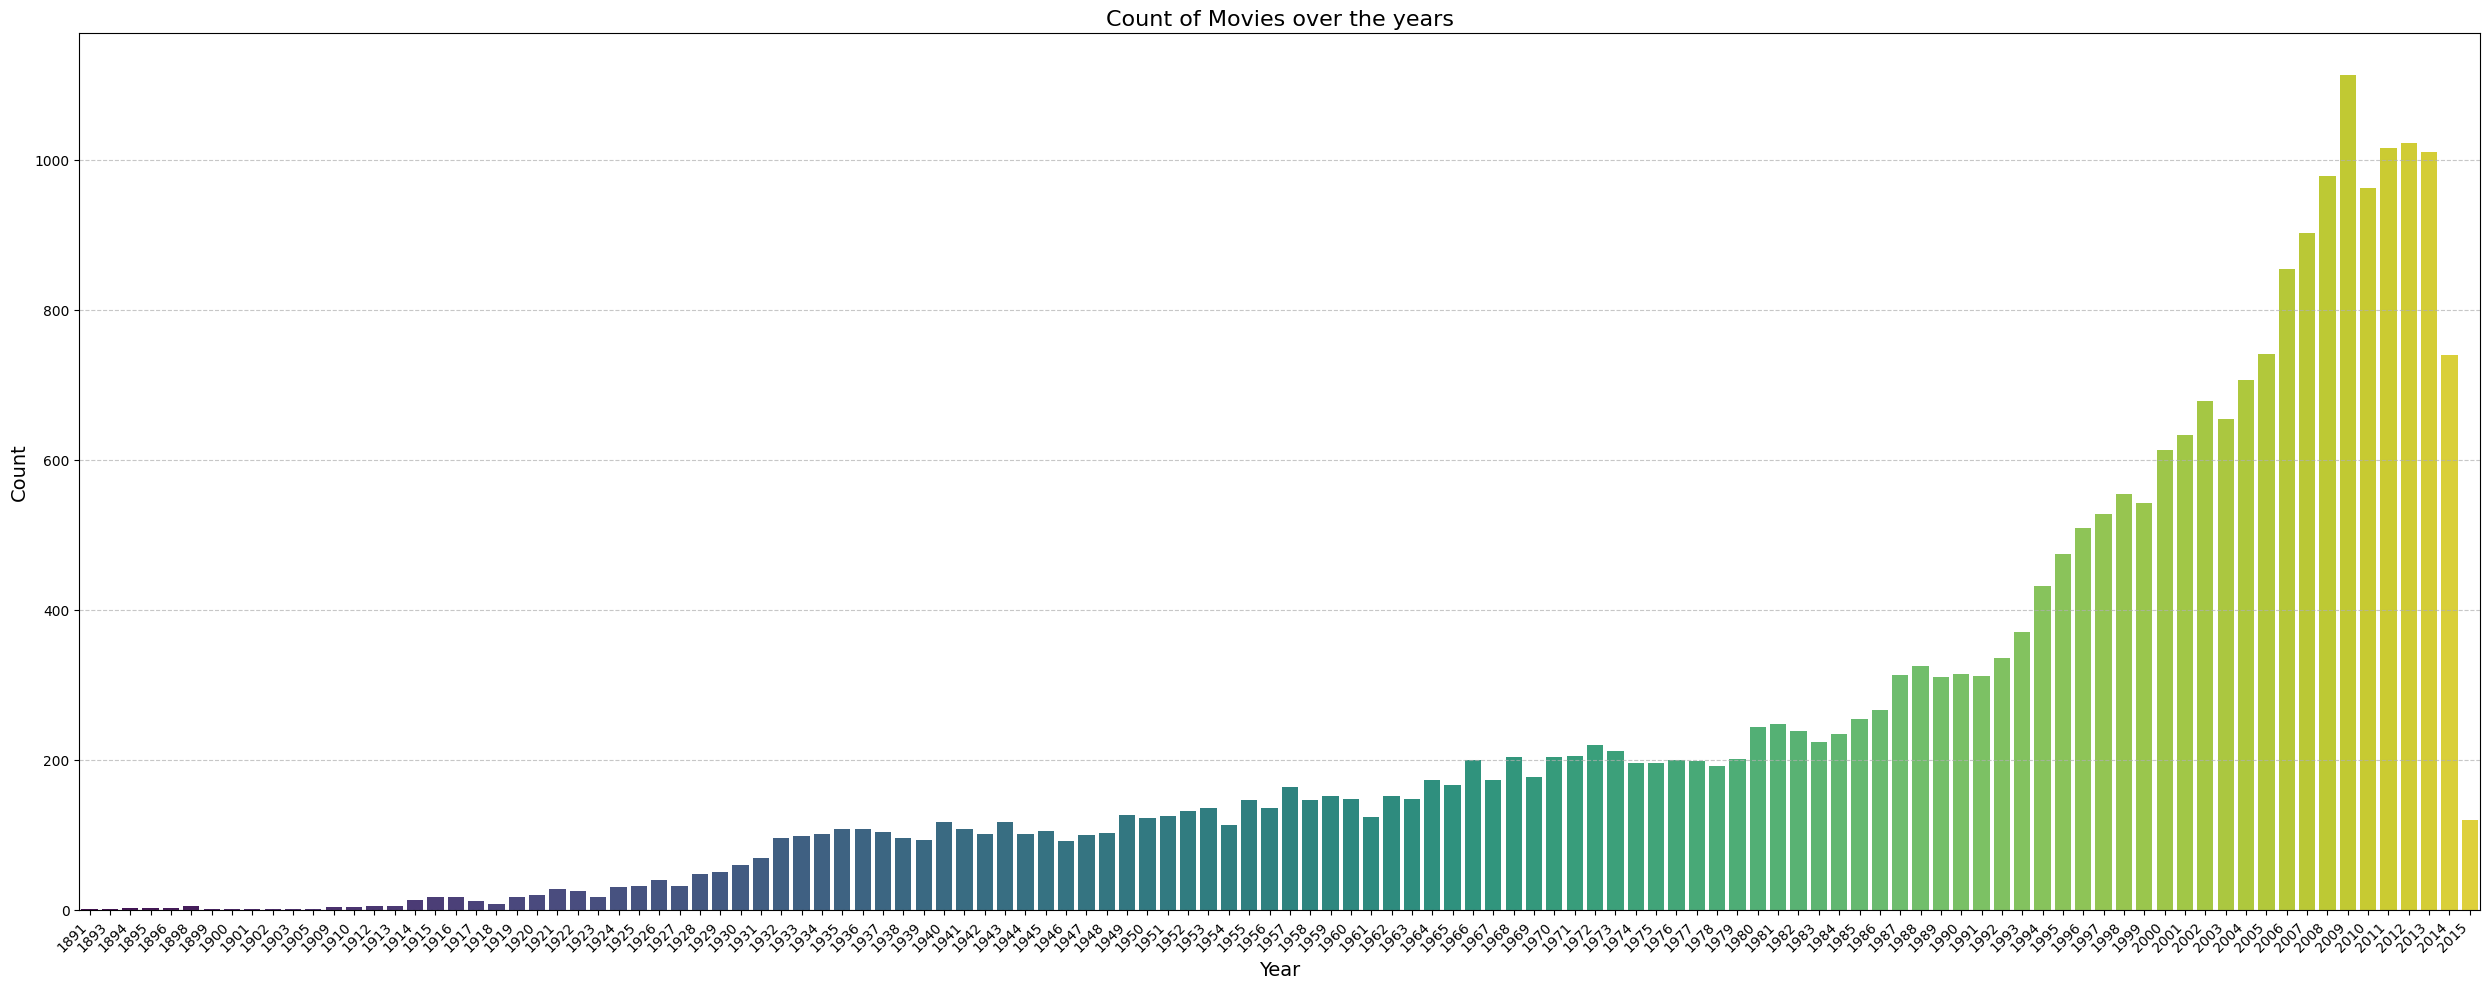

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame

df = q1.toPandas().dropna(axis = 0)

# Plotting
# Plotting
plt.figure(figsize=(25, 10))
sns.barplot(x='year', y='count', data=df.astype(int), palette='viridis')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Movies over the years', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h2>Q3</h2>

/tmp/ipykernel_914277/1688708459.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='avg_rating', data=df, palette='viridis')


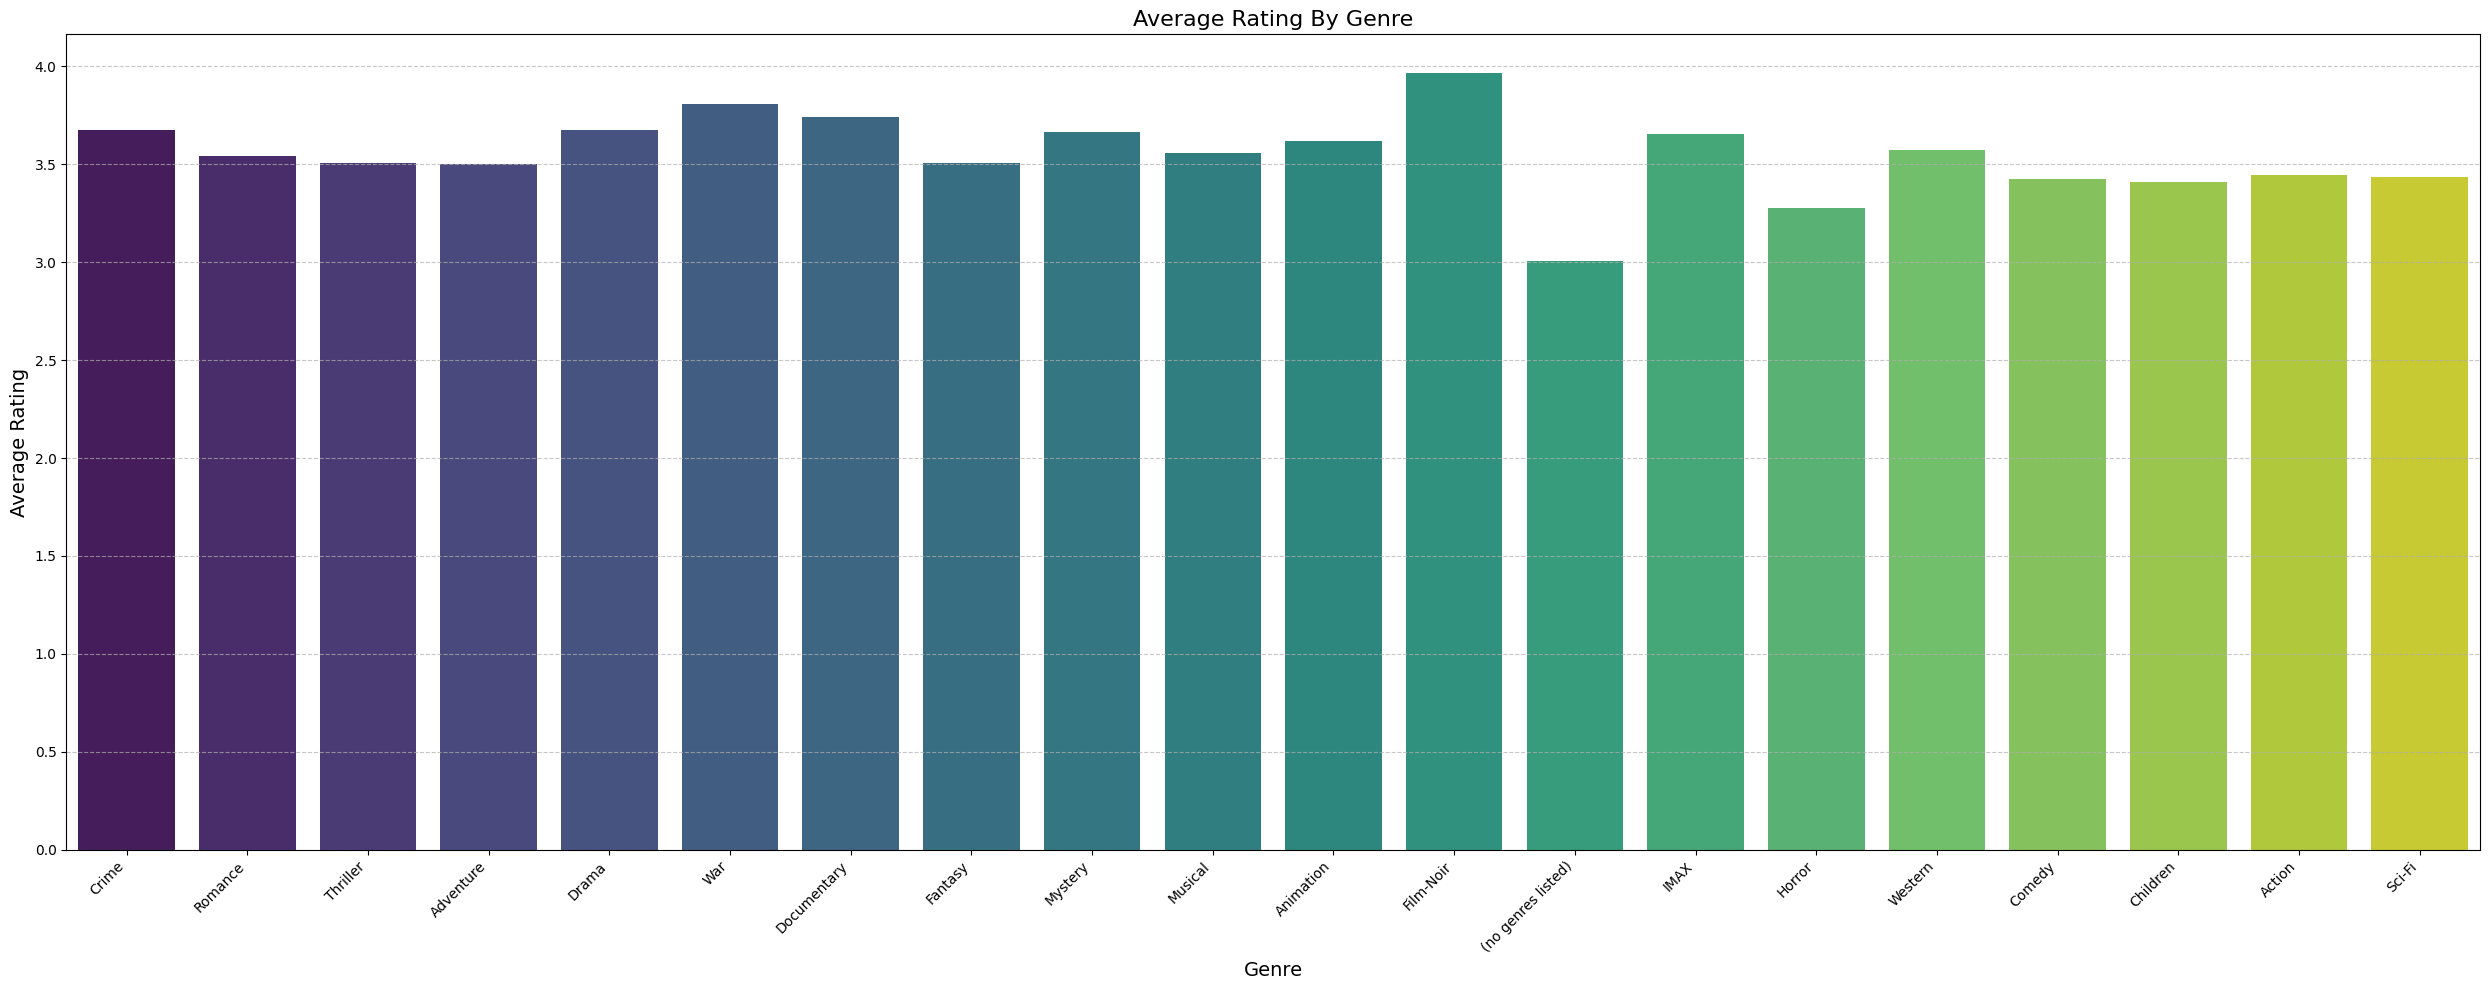

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame\
    
q3 = spark.read.csv("hdfs:////HW4/q3/", header=True)

df = q3.toPandas().dropna(axis = 0)
df['avg_rating'] = df['avg_rating'].astype(float)

# Plotting
# Plotting
plt.figure(figsize=(25, 10))
sns.barplot(x='genre', y='avg_rating', data=df, palette='viridis')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating By Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h2>Q4</h2>

/tmp/ipykernel_914277/1725621959.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre_combo', y='avg_rating', data=df[:10], palette='viridis')


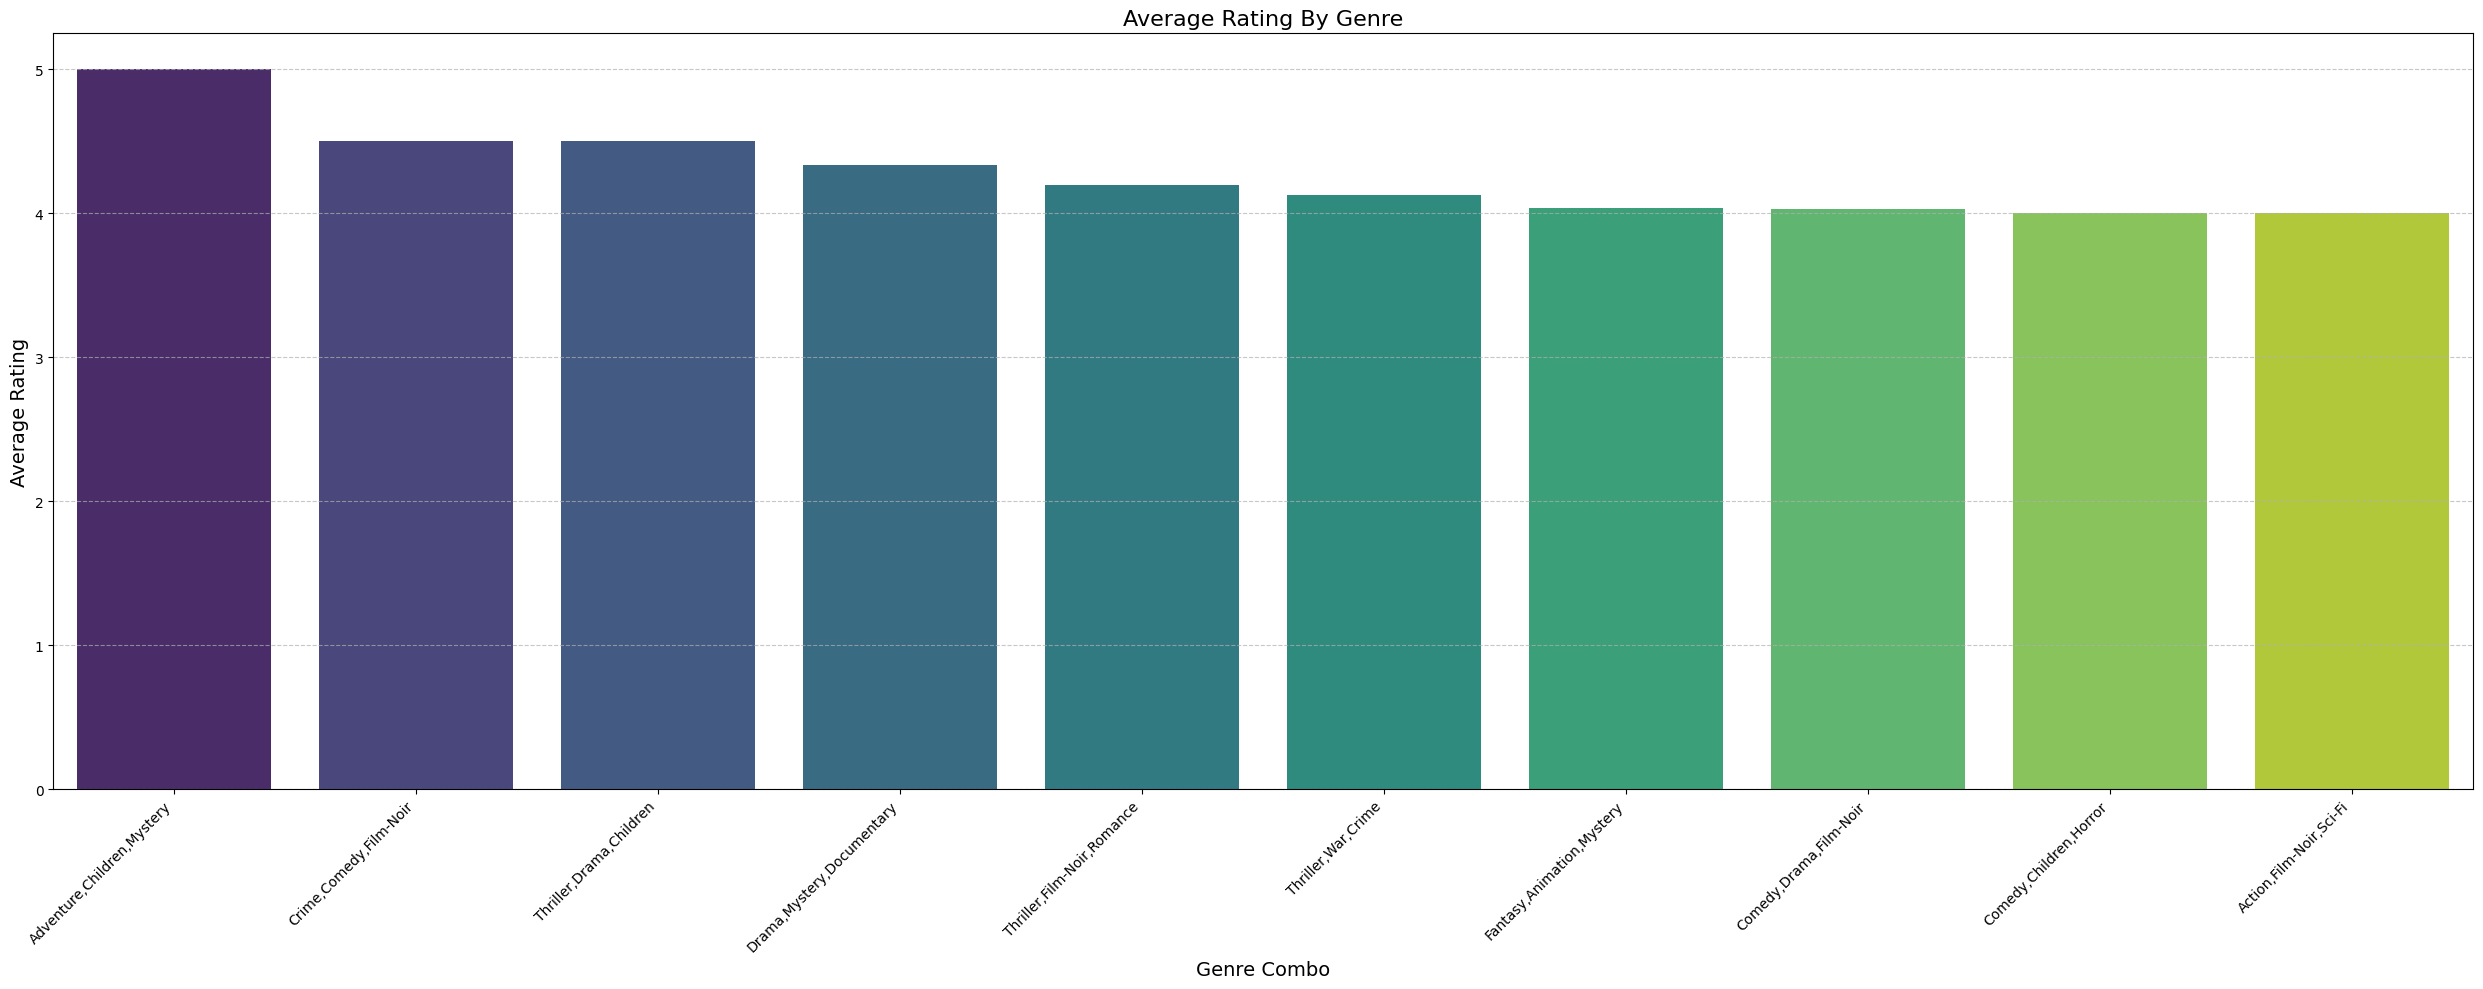

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame\
    
q4 = spark.read.csv("hdfs:////HW4/q4/", header=True)

df = q4.toPandas().dropna(axis = 0)
df['avg_rating'] = df['avg_rating'].astype(float)

# Plotting
# Plotting
plt.figure(figsize=(25, 10))
sns.barplot(x='genre_combo', y='avg_rating', data=df[:10], palette='viridis')
plt.xlabel('Genre Combo', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating By Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h2>Q6</h2>

/tmp/ipykernel_914277/4055854785.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='movie_count', data=df[:10], palette='viridis')


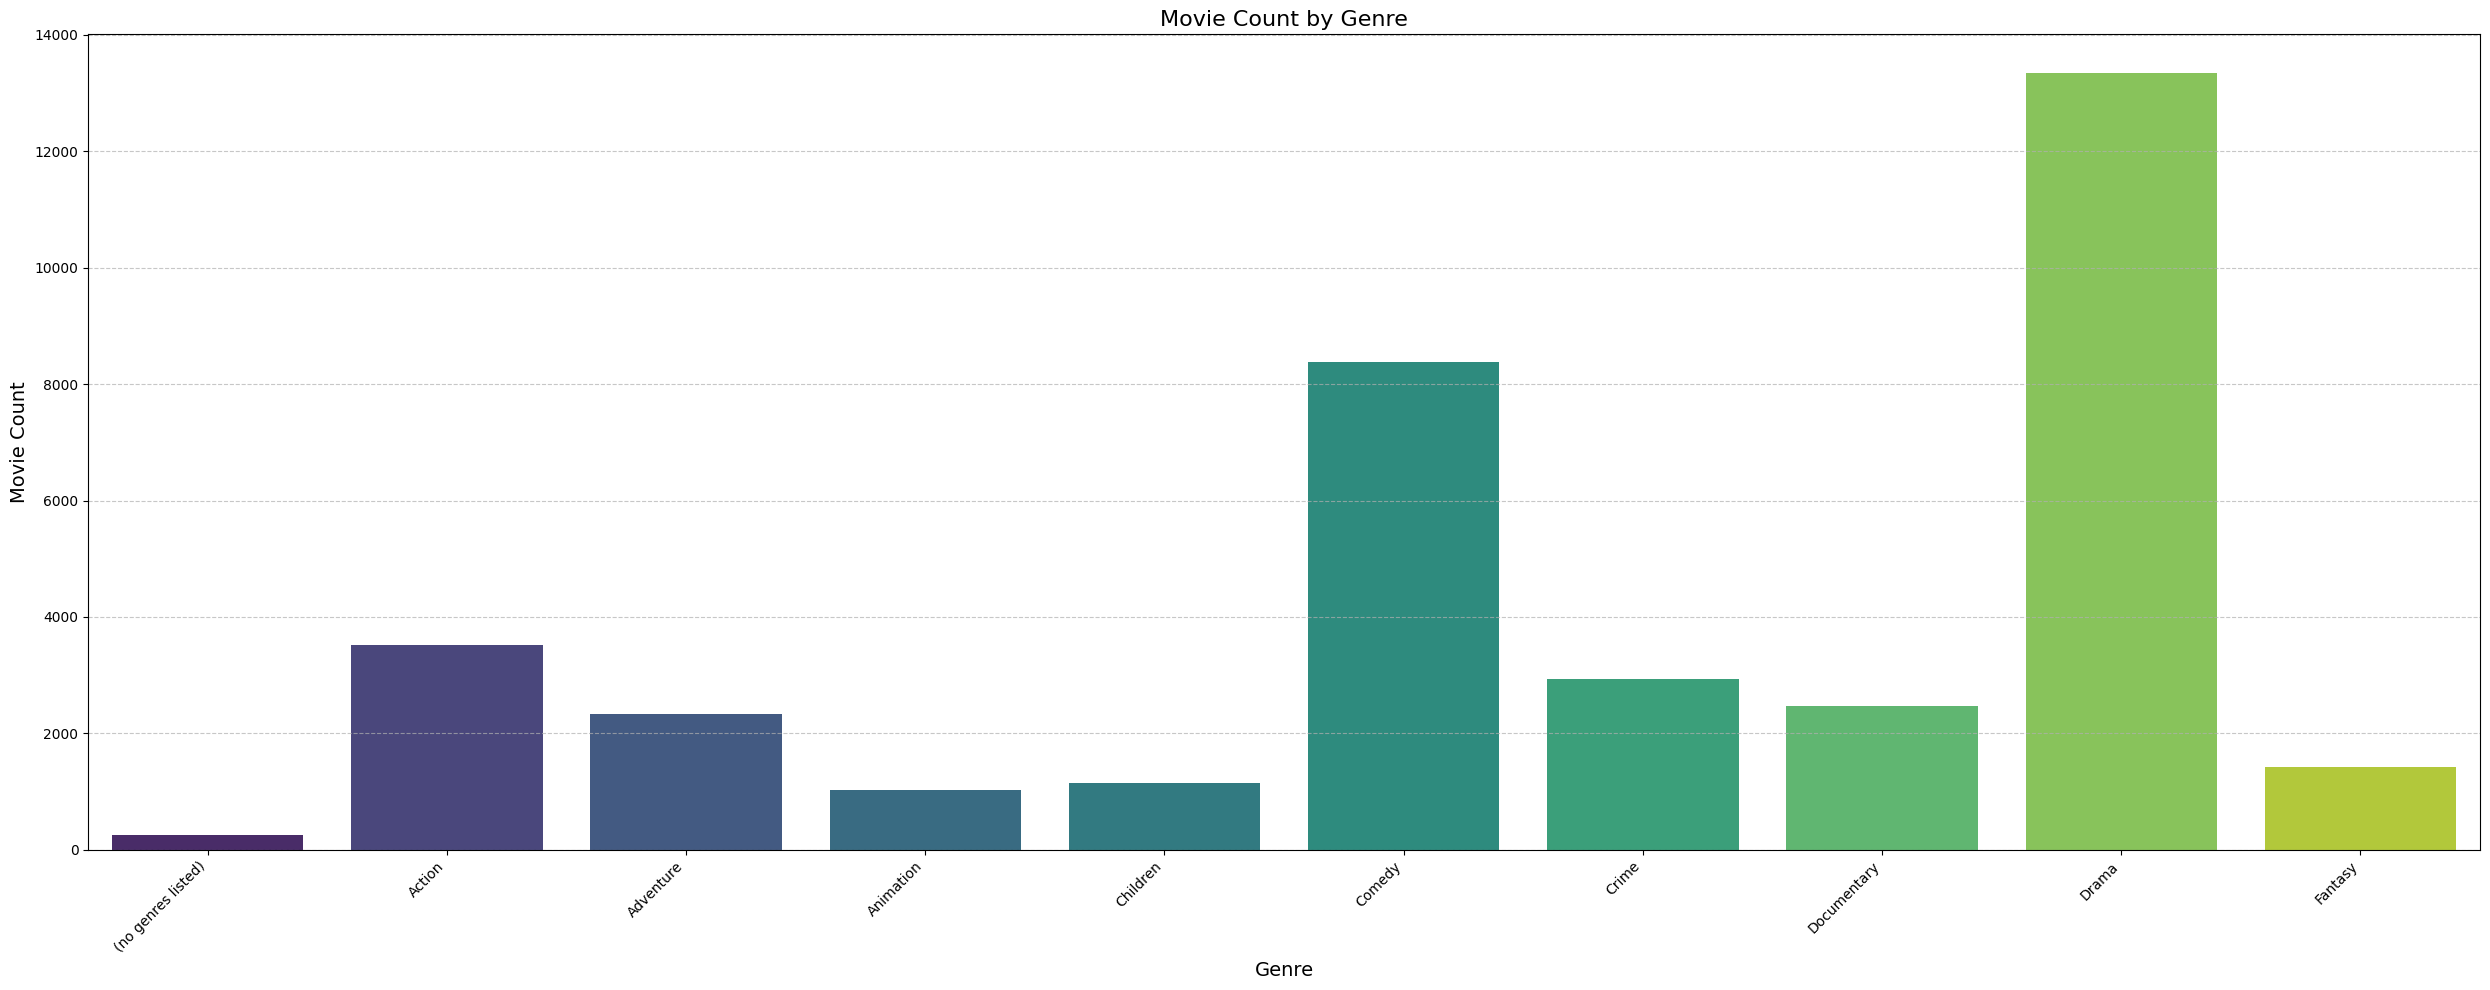

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame\
    
q6 = spark.read.csv("hdfs:////HW4/q6/", header=True)

df = q6.toPandas().dropna(axis = 0)
df['movie_count'] = df['movie_count'].astype(float)

# Plotting
# Plotting
plt.figure(figsize=(25, 10))
sns.barplot(x='genre', y='movie_count', data=df[:10], palette='viridis')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Movie Count', fontsize=14)
plt.title('Movie Count by Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h2>Q7</h2>

In [19]:
q7 = spark.read.csv("hdfs://///HW4/q7_top_words/", header=True)


In [20]:
q7.head()

Row(genre='(no genres listed)', word='story', count='3', rank='1')

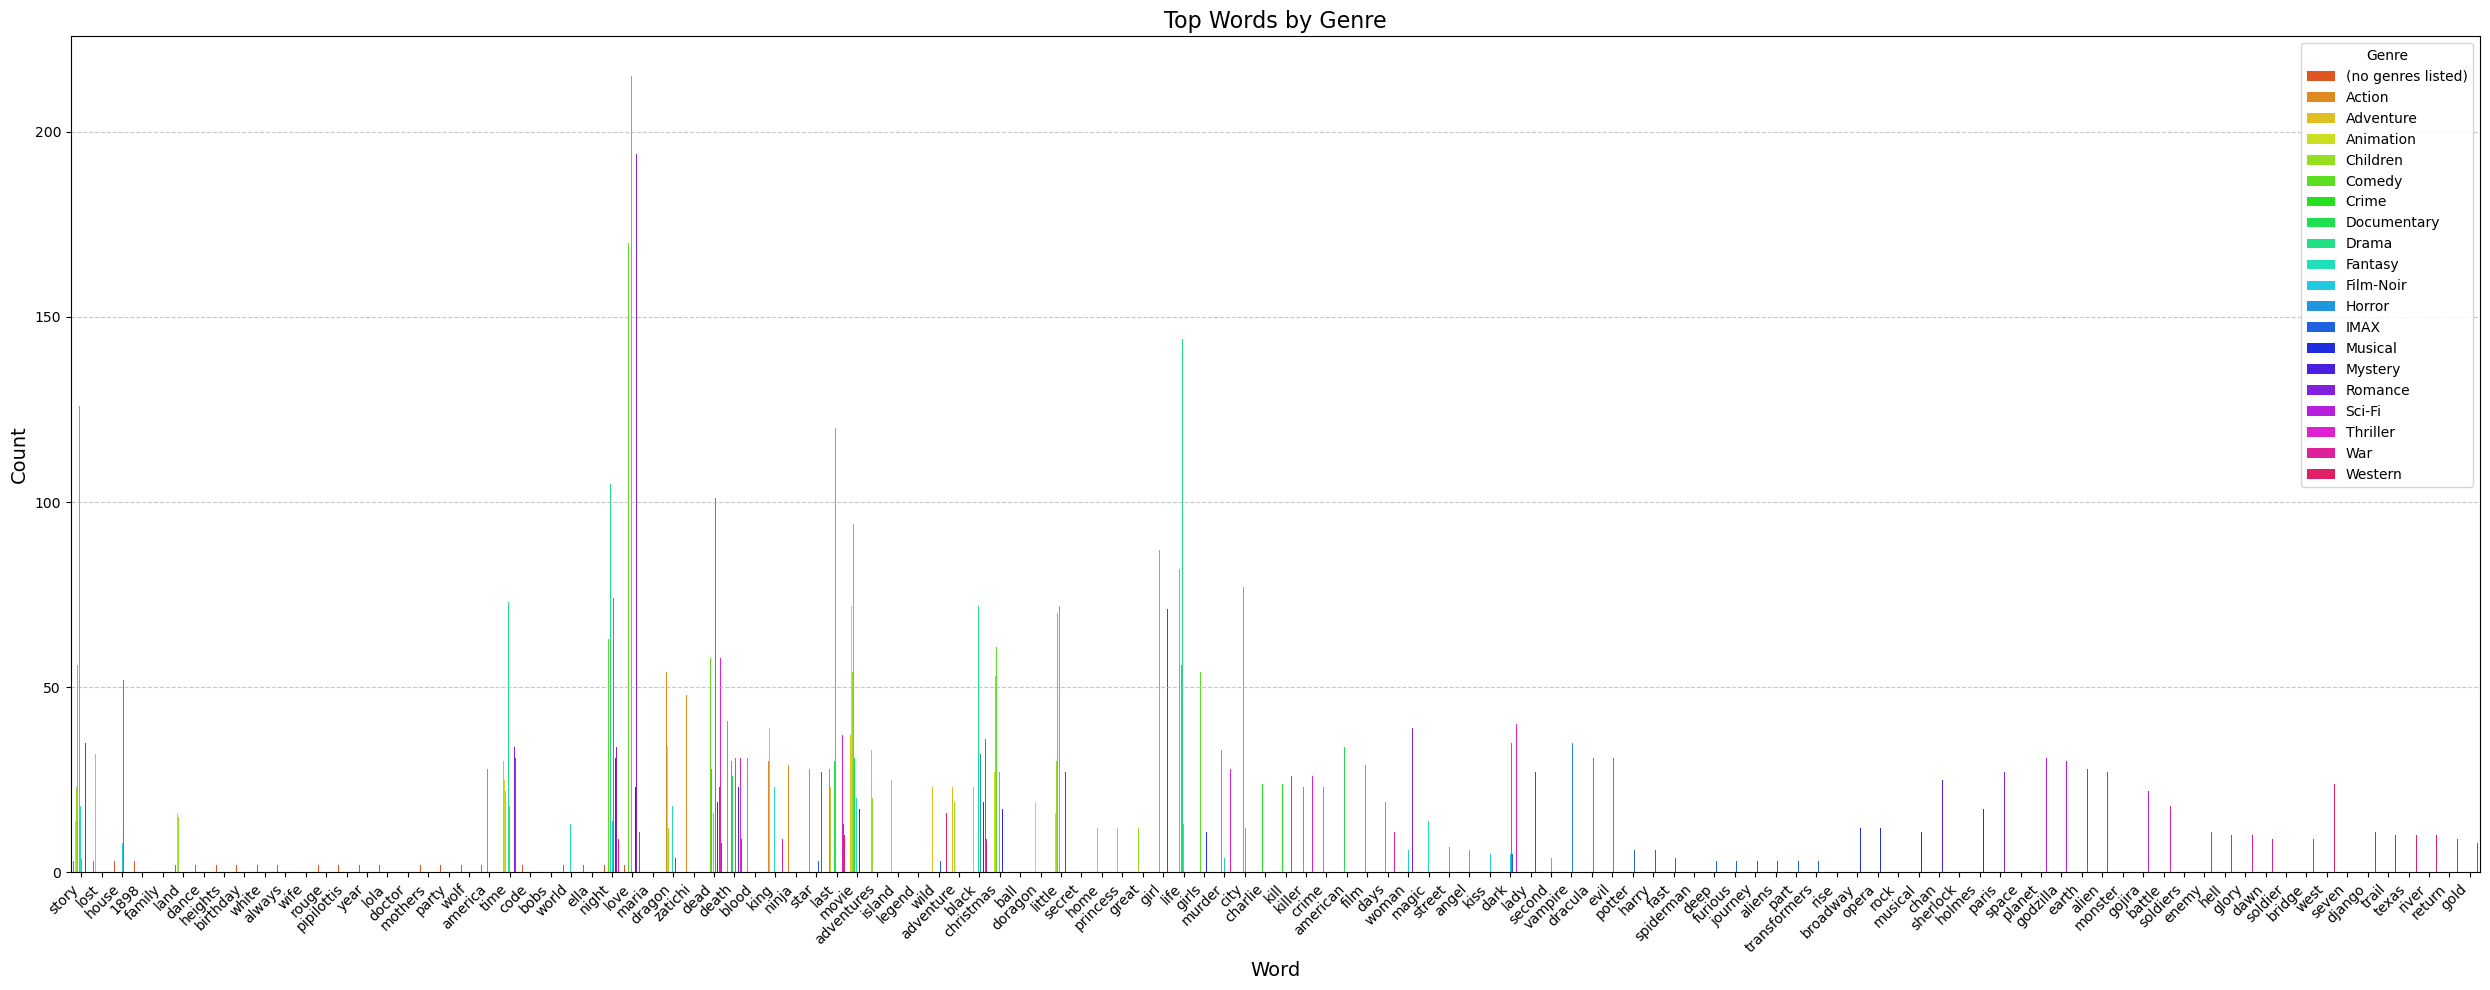

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q7 = spark.read.csv("hdfs:////HW4/q7_top_words/", header=True)

# Convert to Pandas DataFrame and clean data
df = q7.toPandas()
df['count'] = df['count'].astype(float)


# Select a palette or define a custom palette
palette = sns.color_palette('hsv', n_colors=df['genre'].nunique())  # Or any other appropriate palette

# Plotting
plt.figure(figsize=(25, 10))
sns.barplot(x='word', y='count', hue='genre',data=df, palette=palette)  # Plot top words for each genre
plt.xlabel('Word', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top Words by Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1039321/1319214234.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=data, ax=ax, palette='viridis')
/tmp/ipykernel_1039321/1319214234.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=data, ax=ax, palette='viridis')
/tmp/ipykernel_1039321/1319214234.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=data, ax=ax, palette='viridis')
/tmp/ipykernel_1039321/1319214234.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

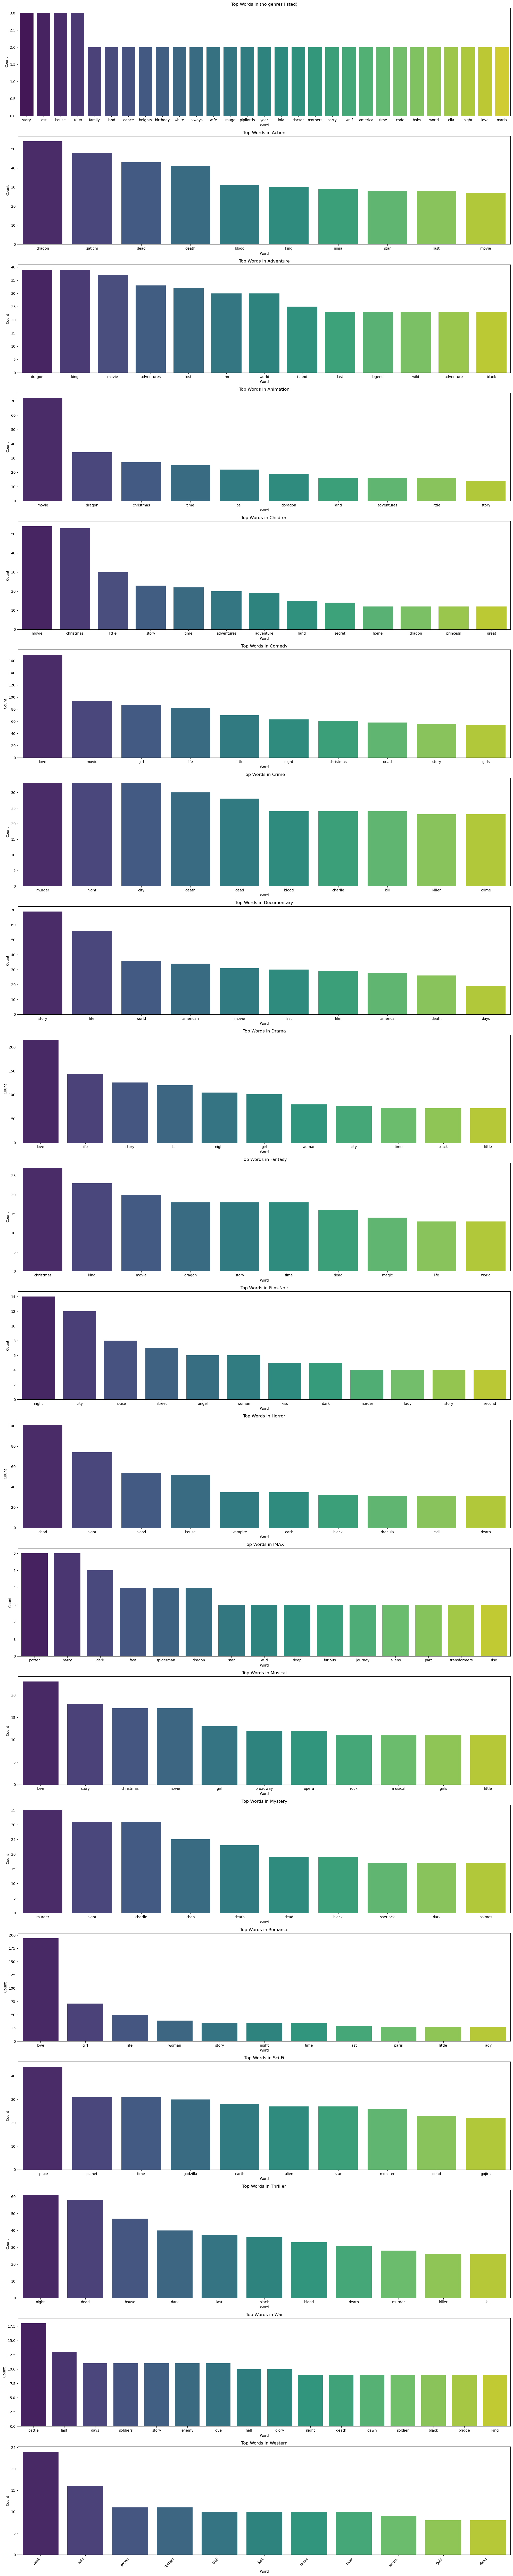

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q7 = spark.read.csv("hdfs:////HW4/q7_top_words/", header=True)
df = q7.toPandas().dropna()
df['count'] = df['count'].astype(float)

# Determine the number of unique genres
genres = df['genre'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(genres), figsize=(20, 5 * len(genres)))

# Loop through genres and plot each one on its own subplot
for ax, genre in zip(axes, genres):
    data = df[df['genre'] == genre]
    sns.barplot(x='word', y='count', data=data, ax=ax, palette='viridis')
    ax.set_title(f'Top Words in {genre}')
    ax.set_xlabel('Word')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
